<a href="https://colab.research.google.com/github/0Notzura/indicium/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1011]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import mean
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/drive/MyDrive/ligthouse/teste_indicium_precificacao.csv')

#Analise Exploratoria

In [978]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


##Retirando as colunas que são somente rotulos

In [979]:
df=df.drop(['id','host_id','nome','host_name'], axis=1)

##Conferindo nformações sobre o formato dos dados

In [980]:
df.shape


(48894, 12)

In [981]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bairro_group                   48894 non-null  object 
 1   bairro                         48894 non-null  object 
 2   latitude                       48894 non-null  float64
 3   longitude                      48894 non-null  float64
 4   room_type                      48894 non-null  object 
 5   price                          48894 non-null  int64  
 6   minimo_noites                  48894 non-null  int64  
 7   numero_de_reviews              48894 non-null  int64  
 8   ultima_review                  38842 non-null  object 
 9   reviews_por_mes                38842 non-null  float64
 10  calculado_host_listings_count  48894 non-null  int64  
 11  disponibilidade_365            48894 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usag

##Conferindo a cardinalidade de cada dado para evitar overfiting

In [982]:
df.nunique()

bairro_group                         5
bairro                             221
latitude                         19048
longitude                        14718
room_type                            3
price                              674
minimo_noites                      109
numero_de_reviews                  394
ultima_review                     1764
reviews_por_mes                    937
calculado_host_listings_count       47
disponibilidade_365                366
dtype: int64

##Conferindo valores nulos para trata-los

In [983]:
df.isnull().sum()

bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

##Conjunto de analises mais iniciais para ter ideia de como estão distribuiods os dados

In [984]:
df.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##Vizualização dos dados de forma mais entendivel

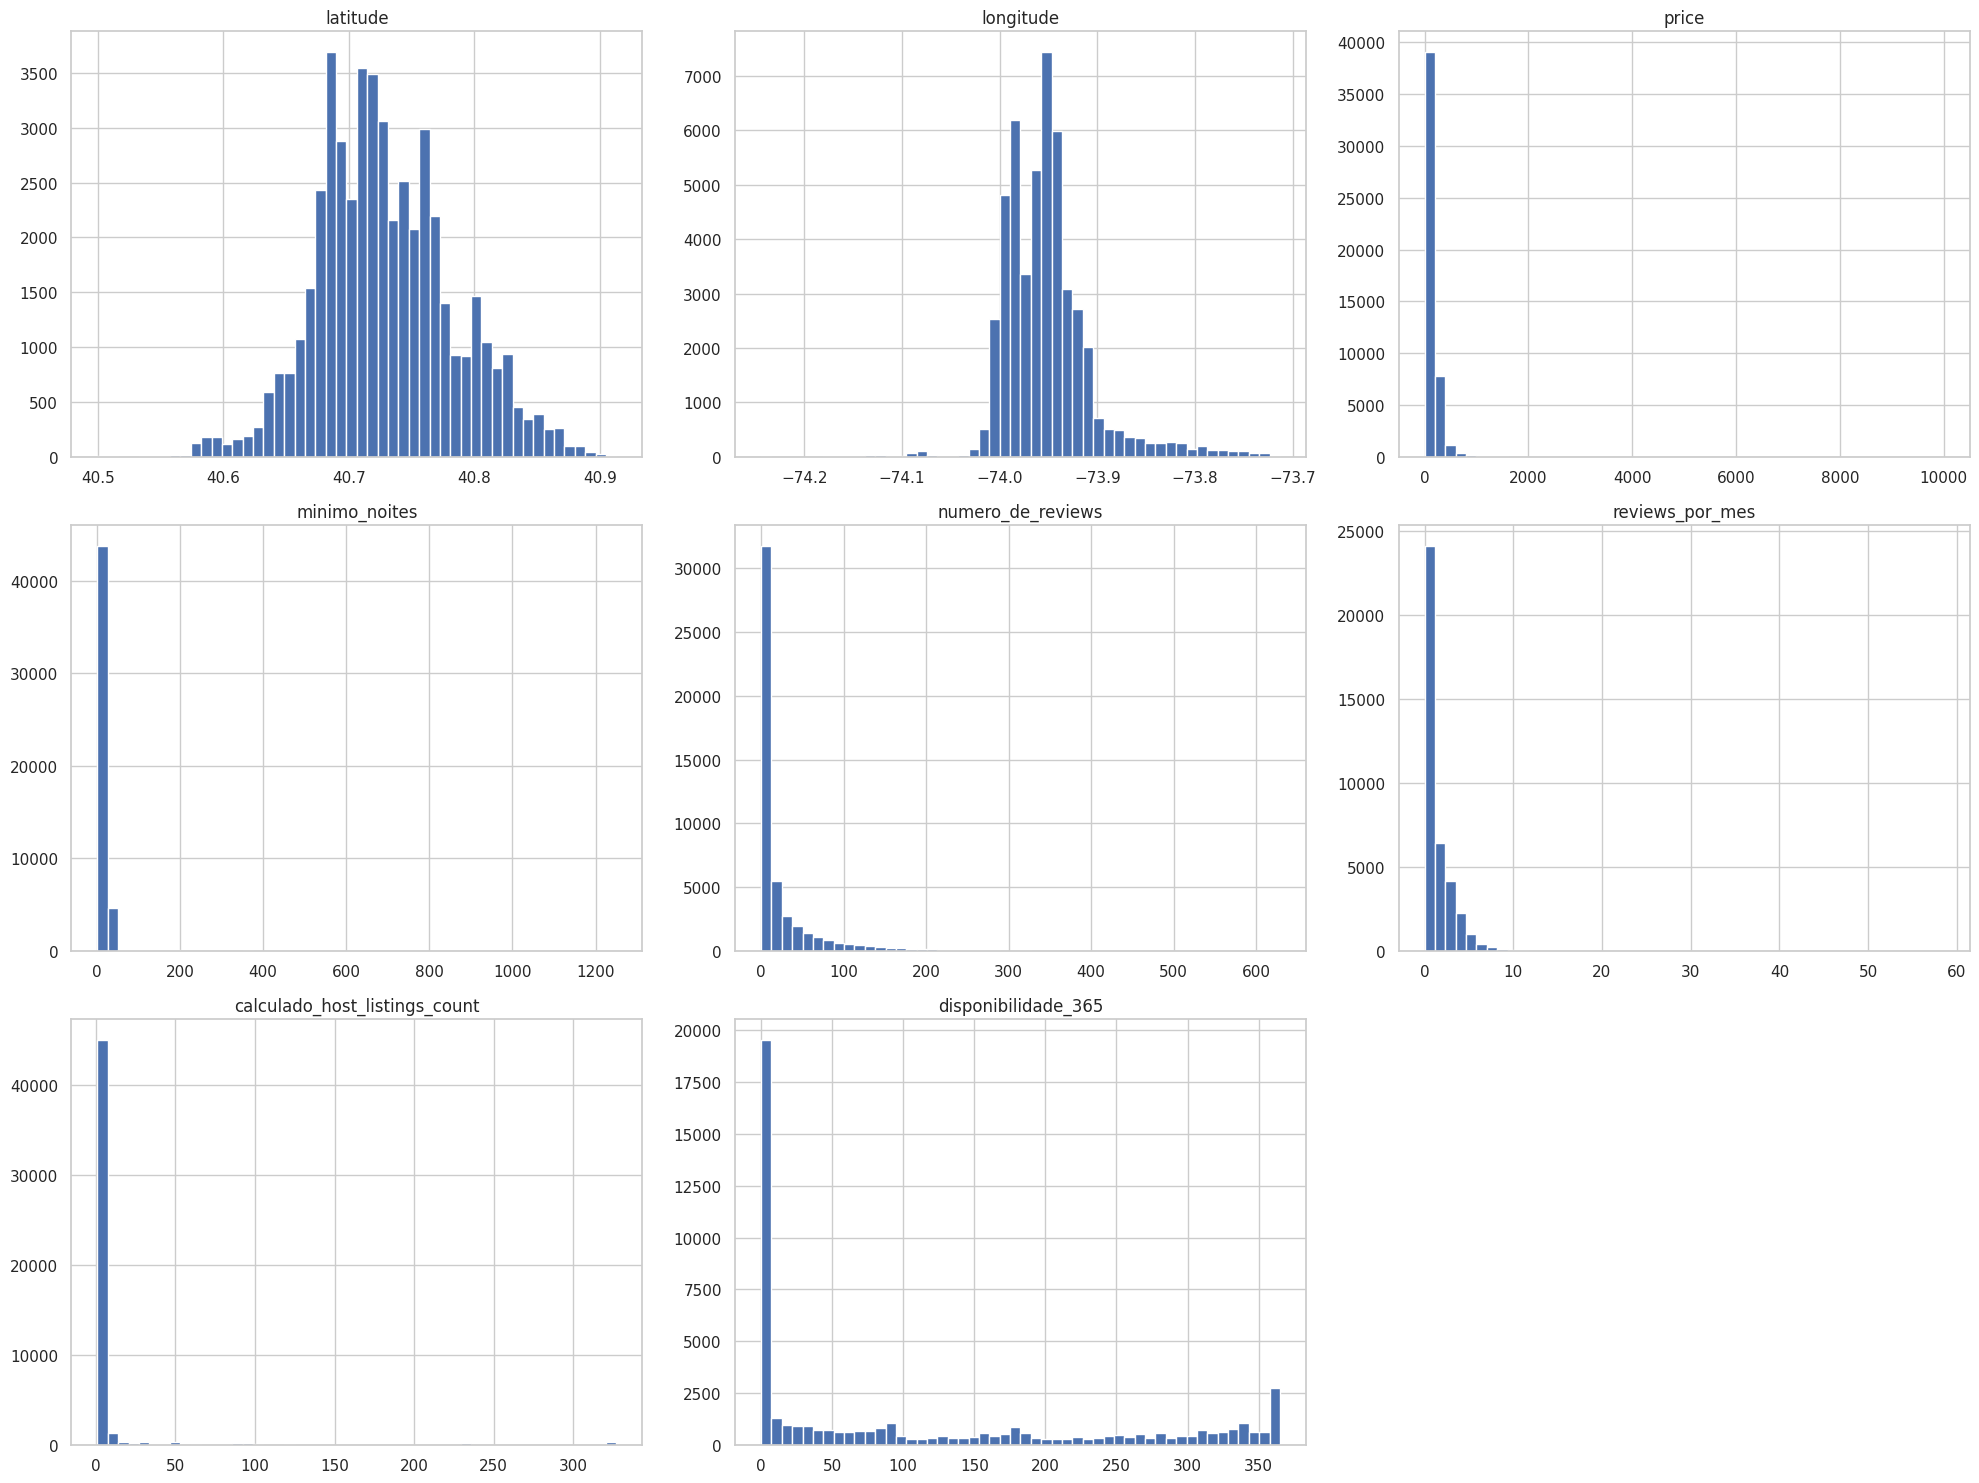

In [985]:
df.hist(bins=50, figsize=(20,15))
plt.show()

##Analise de dias disponiveis de seus apartamentos por tipo, bairro e grupo de bairros

<ipython-input-986-617d5452adfd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='bairro_group',y='disponibilidade_365',palette='plasma')


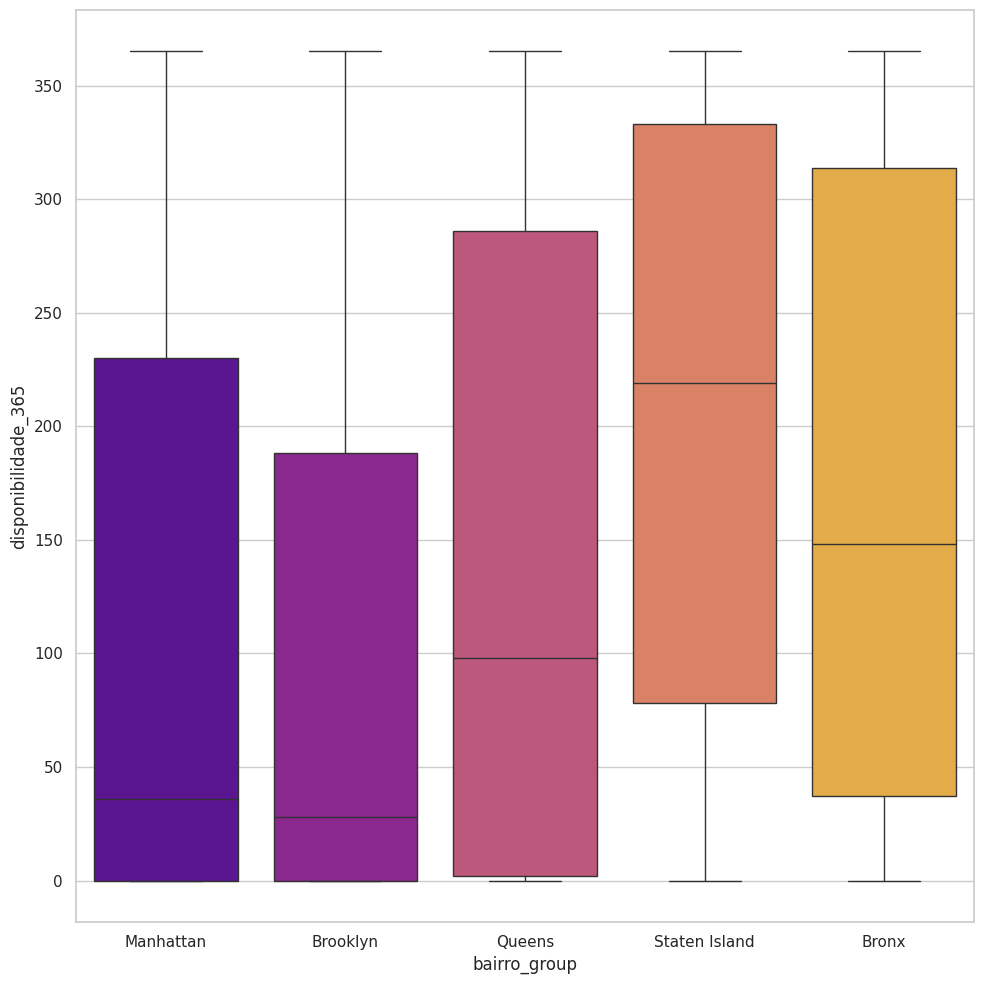

In [986]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='bairro_group',y='disponibilidade_365',palette='plasma')

<ipython-input-987-e162ac8391d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='bairro',y='disponibilidade_365',palette='plasma')


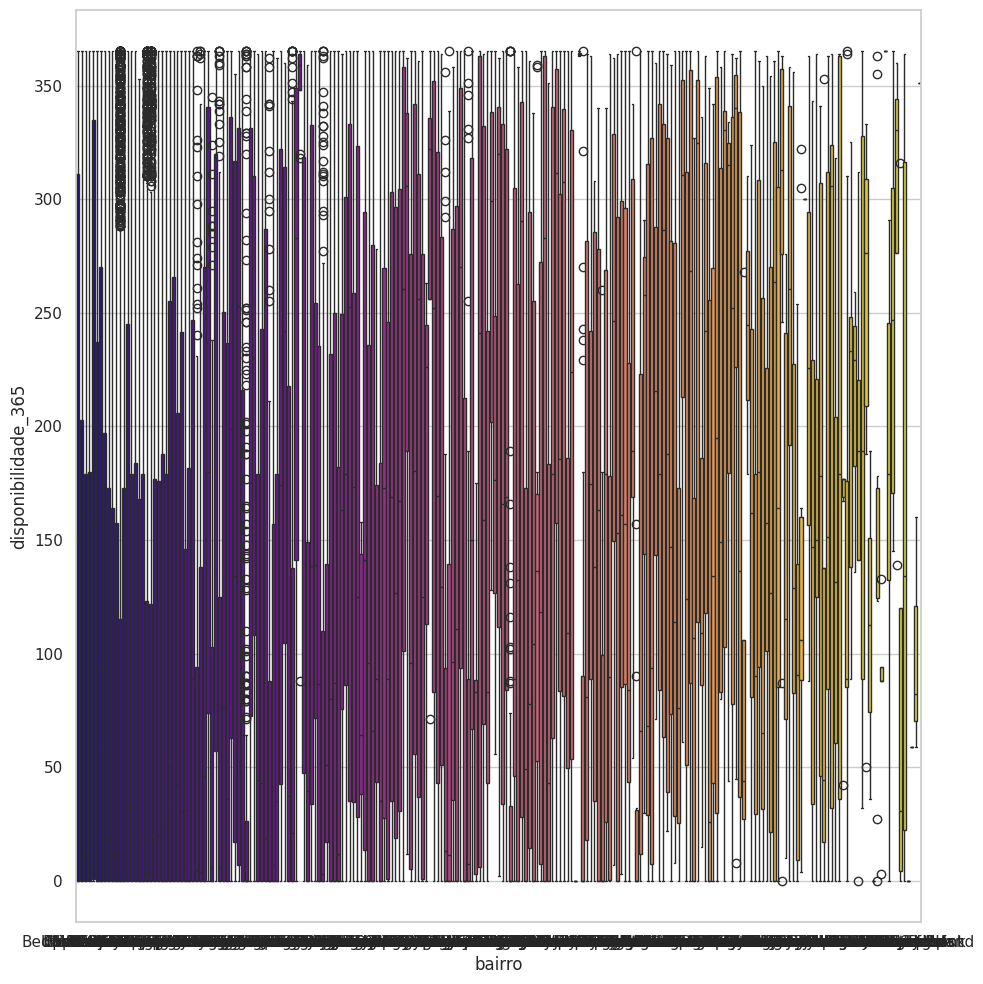

In [987]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='bairro',y='disponibilidade_365',palette='plasma')

<ipython-input-988-4d11ebcc5581>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='room_type',y='disponibilidade_365',palette='plasma')


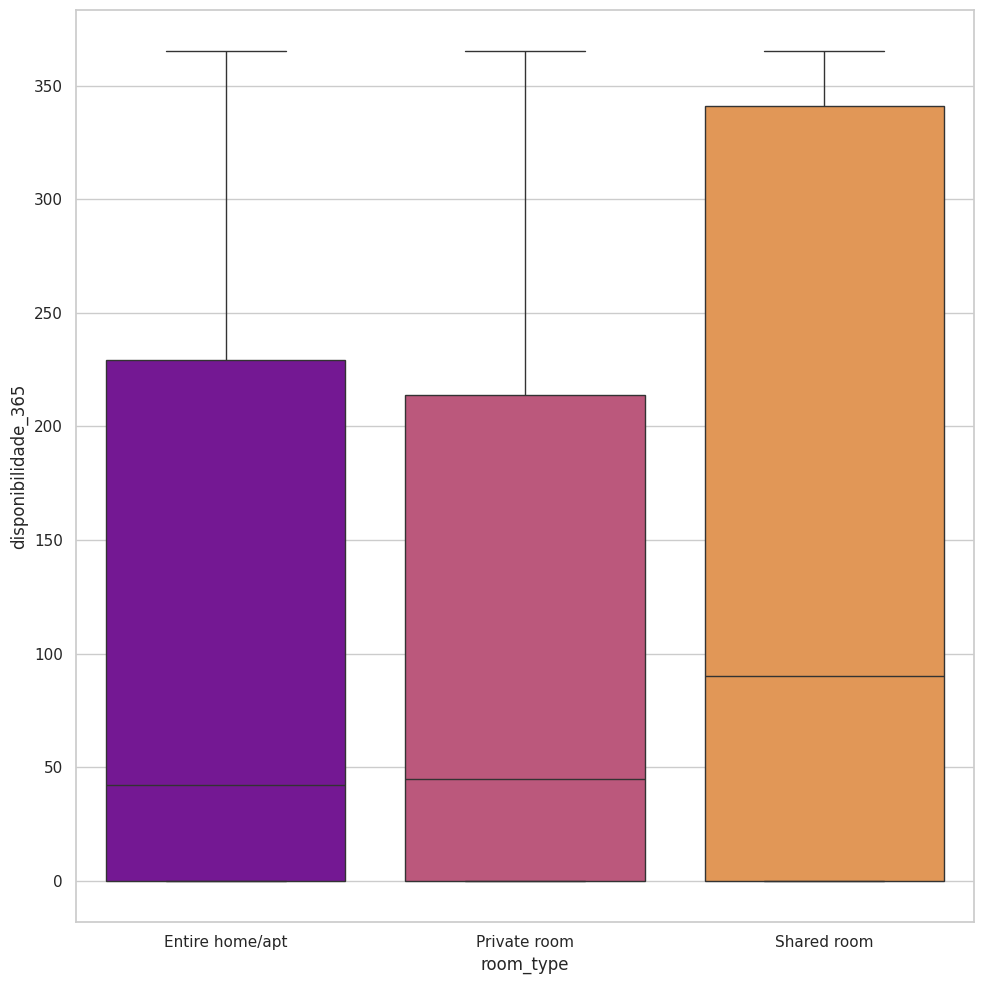

In [988]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='room_type',y='disponibilidade_365',palette='plasma')

##Analise da distribuição de apartamentos disponiveis para alugar por bairro, tipo e grupo de bairros

<ipython-input-989-69aa39dcdb27>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=segmento, data=df, palette='coolwarm')


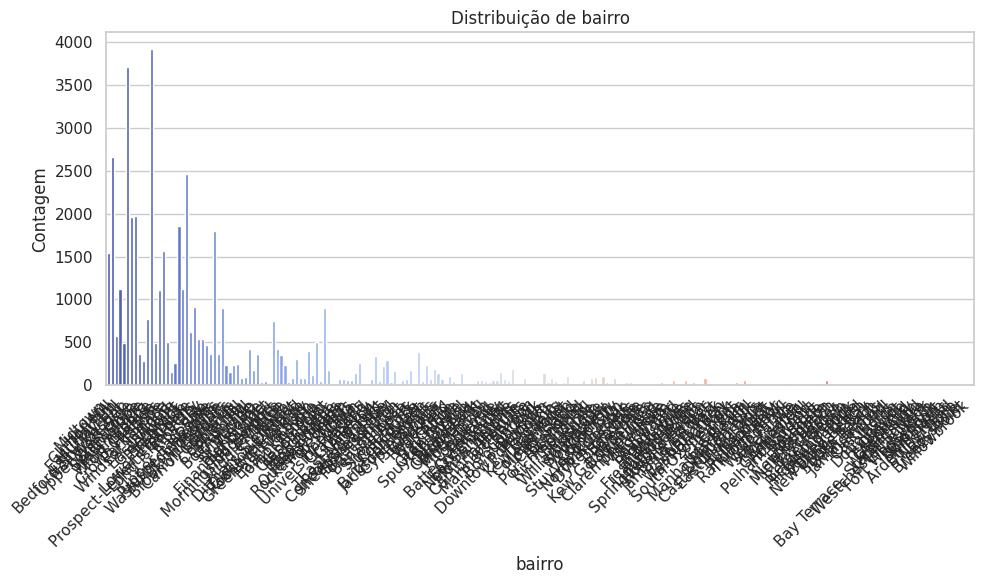

<ipython-input-989-69aa39dcdb27>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=segmento, data=df, palette='coolwarm')


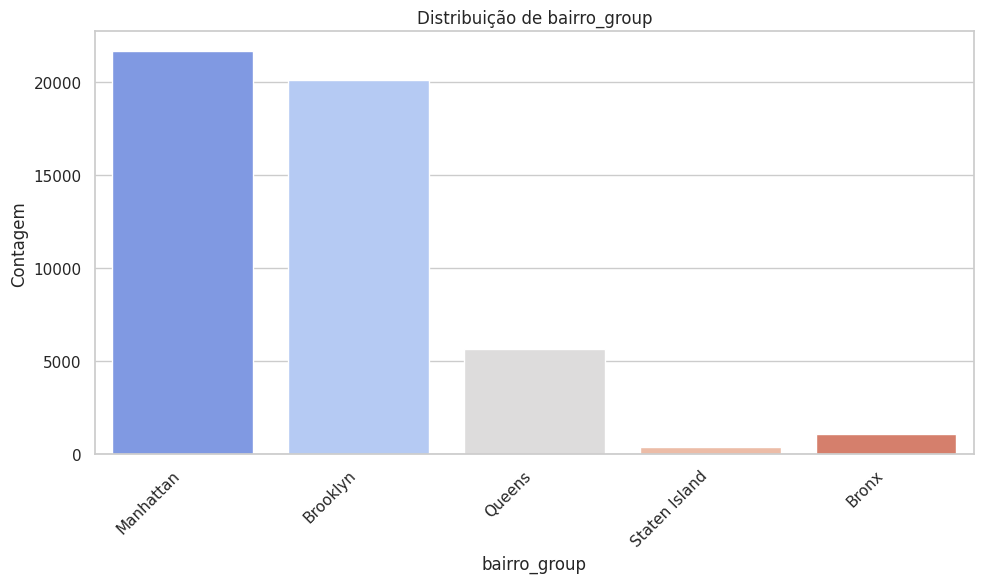

<ipython-input-989-69aa39dcdb27>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=segmento, data=df, palette='coolwarm')


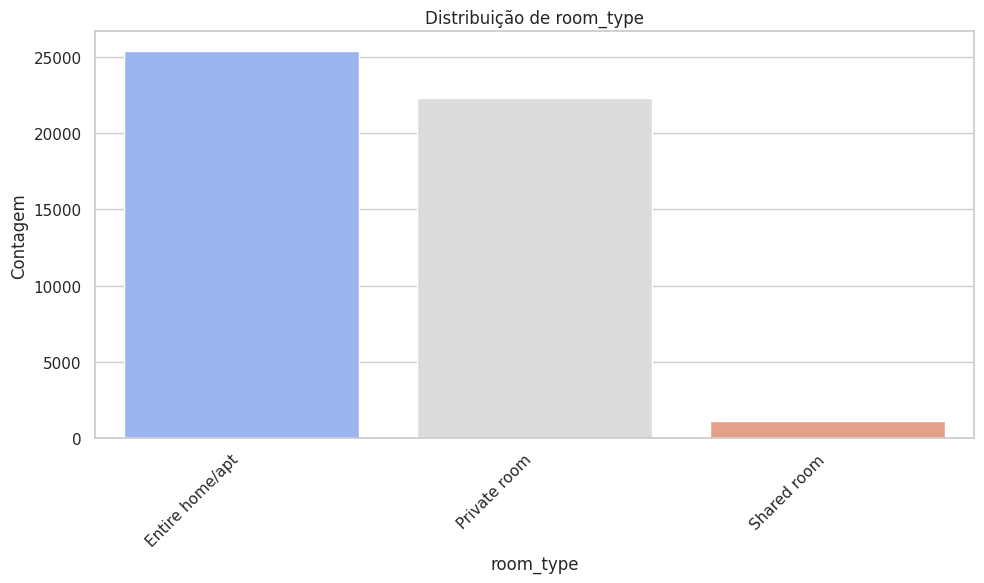

In [989]:

# Supondo que 'df' seja o seu DataFrame
# Primeiro, definimos uma lista com as colunas pelas quais queremos segmentar
segmentos = ['bairro', 'bairro_group','room_type']

for segmento in segmentos:
    plt.figure(figsize=(10, 6))  # Ajuste o tamanho conforme necessário
    sns.countplot(x=segmento, data=df, palette='coolwarm')

    plt.title(f'Distribuição de {segmento}')  # Definindo o título do gráfico
    plt.xticks(rotation=45, ha='right')  # Rotacionando os rótulos do eixo x para melhor visualização
    plt.ylabel('Contagem')  # Rótulo do eixo y
    plt.xlabel(segmento)  # Rótulo do eixo x

    plt.tight_layout()  # Ajustando automaticamente os parâmetros do subplot
    plt.show()  # Exibindo o gráfico


##2.Analise dos preços medios dos apartamentos por tipo, grupo de bairros e bairro


<ipython-input-990-a5b9eaa2f508>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=segmento, y='price', data=df, palette='coolwarm', estimator=np.mean, ci='sd')
<ipython-input-990-a5b9eaa2f508>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segmento, y='price', data=df, palette='coolwarm', estimator=np.mean, ci='sd')


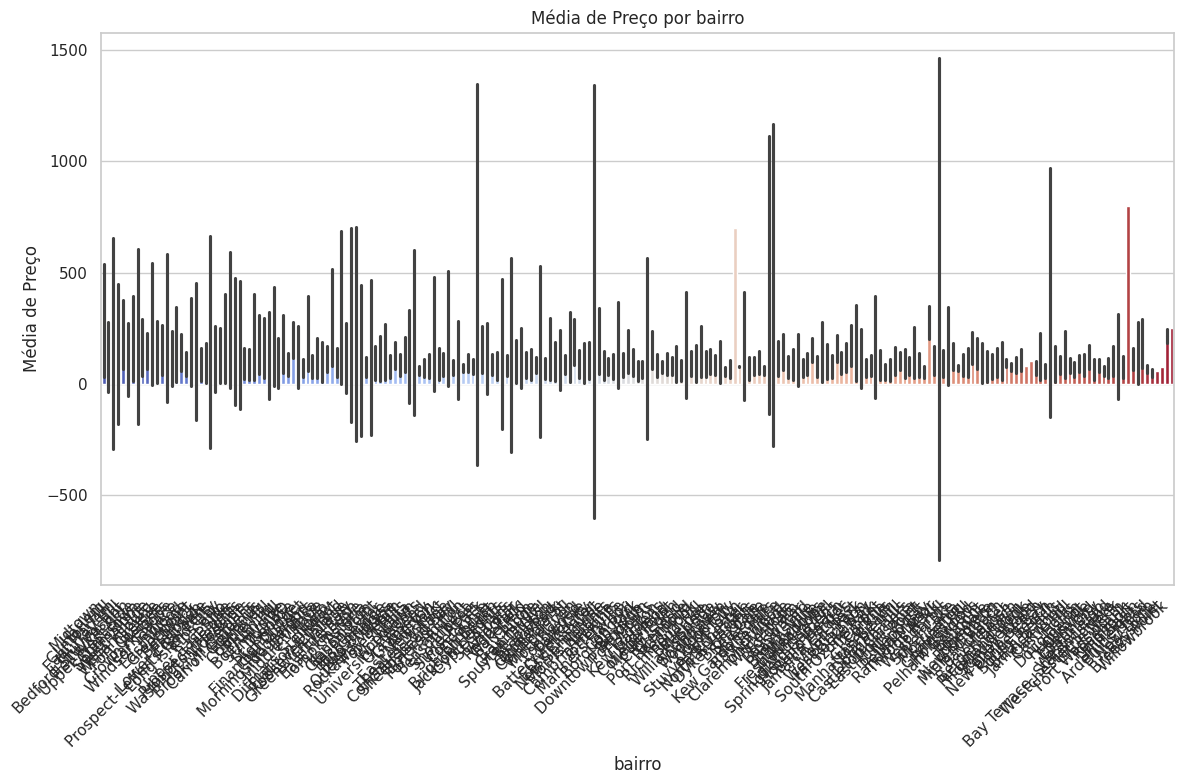

<ipython-input-990-a5b9eaa2f508>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=segmento, y='price', data=df, palette='coolwarm', estimator=np.mean, ci='sd')
<ipython-input-990-a5b9eaa2f508>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segmento, y='price', data=df, palette='coolwarm', estimator=np.mean, ci='sd')


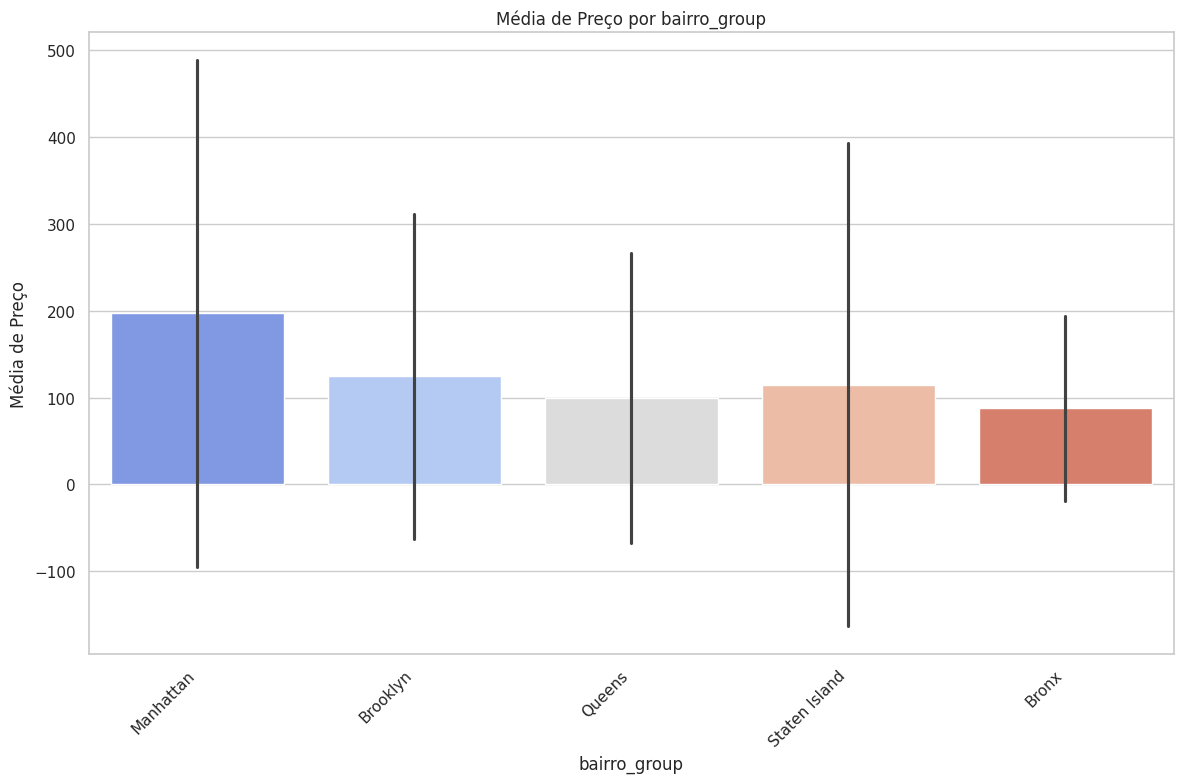

<ipython-input-990-a5b9eaa2f508>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=segmento, y='price', data=df, palette='coolwarm', estimator=np.mean, ci='sd')
<ipython-input-990-a5b9eaa2f508>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segmento, y='price', data=df, palette='coolwarm', estimator=np.mean, ci='sd')


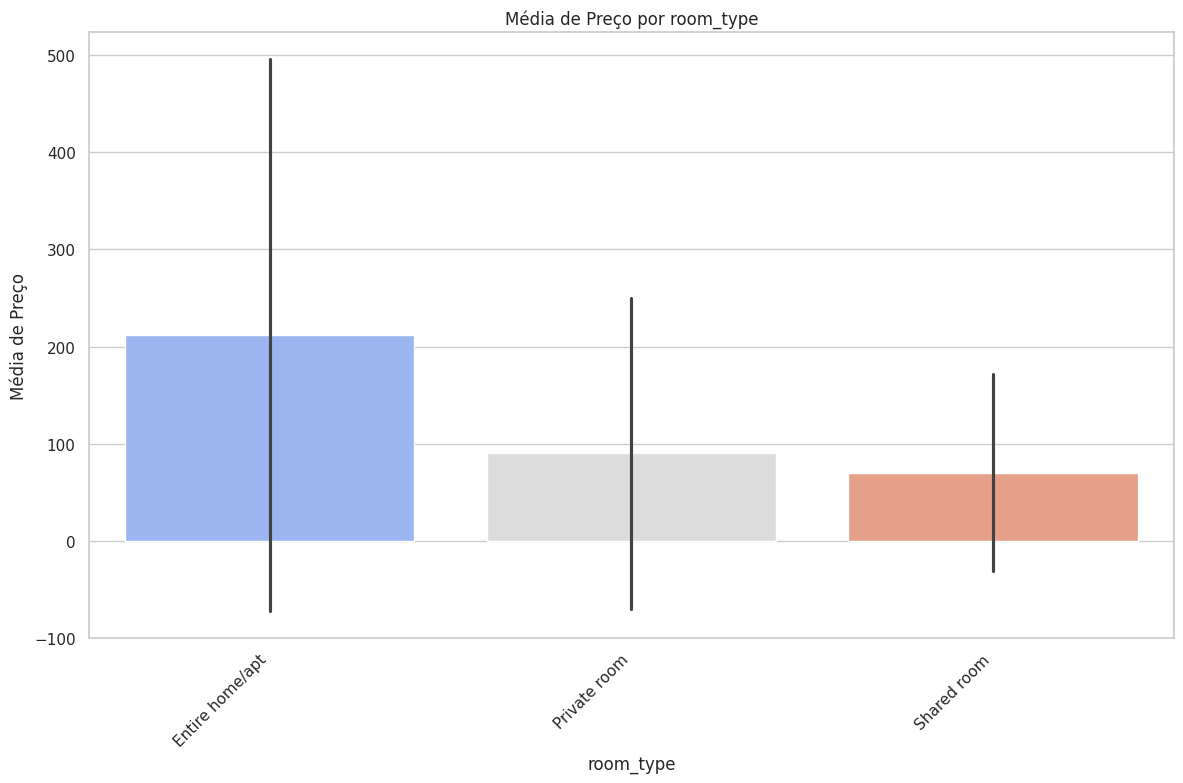

In [990]:
for segmento in segmentos:
    plt.figure(figsize=(12, 8))  # Ajuste o tamanho conforme necessário
    sns.barplot(x=segmento, y='price', data=df, palette='coolwarm', estimator=np.mean, ci='sd')

    plt.title(f'Média de Preço por {segmento}')  # Definindo o título do gráfico
    plt.xticks(rotation=45, ha='right')  # Rotacionando os rótulos do eixo x para melhor visualização
    plt.ylabel('Média de Preço')  # Rótulo do eixo y
    plt.xlabel(segmento)  # Rótulo do eixo x

    plt.tight_layout()  # Ajustando automaticamente os parâmetros do subplot
    plt.show()

#2)a.
De acordo com os dados analisados o melhor local para se comprar um apartamento pençando no aluguel seria em manhattan que tem a maior media de preçoes e o maior preço tambem.

##2)c.
De acordo com os numeros, existe uma correlação entre preço e local, sendo a ordem do menos valorizado pro mais:
Bronx, State Island Queens, Brooklyn, Manhattan

##Analise da correlação entre os dados numericos e o preço usando a tabela de correlação


<ipython-input-991-d69bc6b87d37>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


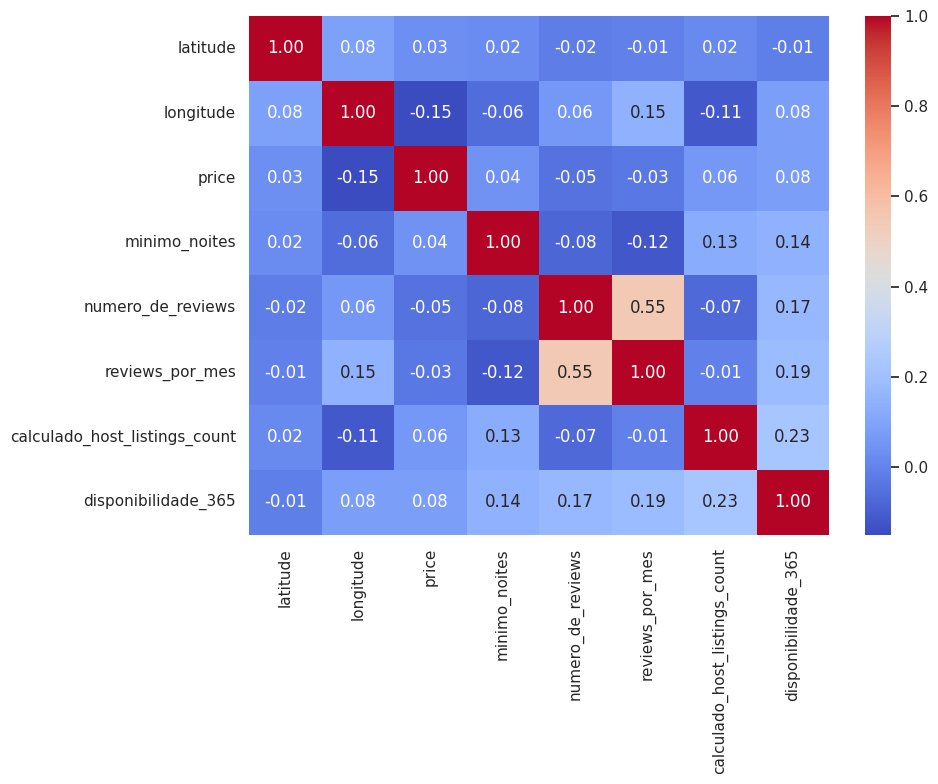

In [991]:
plt.figure(figsize=(10, 8))  # Você pode ajustar esses valores conforme necessário

# Criando o heatmap
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')

# Mostrando o gráfico
plt.show()

##2)b.
Como visto na tabela, o numero de noites minimo e o numero de dias disponiveis não interferem no preço do aluguel

#3. Escolhendo os dados e montando o modelo

##Remoção de colunas se correlação com o preço, de acordo com a tabela de correlação

In [1012]:
#remoção de colunas com cardinalidade muito grande
df = df.drop(['latitude', 'longitude','ultima_review','disponibilidade_365','calculado_host_listings_count','minimo_noites',
              'numero_de_reviews','reviews_por_mes'], axis=1)

##Busca de outliers de acordo com o preço

In [993]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(outliers)

      bairro_group              bairro        room_type  price
60       Manhattan             Chelsea  Entire home/apt    375
84        Brooklyn    Brooklyn Heights  Entire home/apt    800
102      Manhattan        West Village  Entire home/apt    500
113      Manhattan        East Village  Entire home/apt    350
120       Brooklyn         South Slope  Entire home/apt    400
...            ...                 ...              ...    ...
48757       Queens    Long Island City  Entire home/apt    350
48832    Manhattan  Financial District  Entire home/apt    475
48838     Brooklyn      Sheepshead Bay     Private room    800
48841    Manhattan             Chelsea  Entire home/apt    350
48855     Brooklyn  Bedford-Stuyvesant  Entire home/apt    345

[2972 rows x 4 columns]


##Tratamento dos outliers, usando limites de minimo e maximo

In [994]:
df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])
df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])


##Criação do codificador para transformar as colunas em formato texto em numerico

In [995]:
def Encode(df):
    for column in df.columns[df.columns.isin(['bairro_group','bairro' ,'room_type'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

In [996]:
df_en['price'] = np.log1p(df['price'])

##Analise da correlação entre o bairro, o tipo e o grupo de barros com o preço

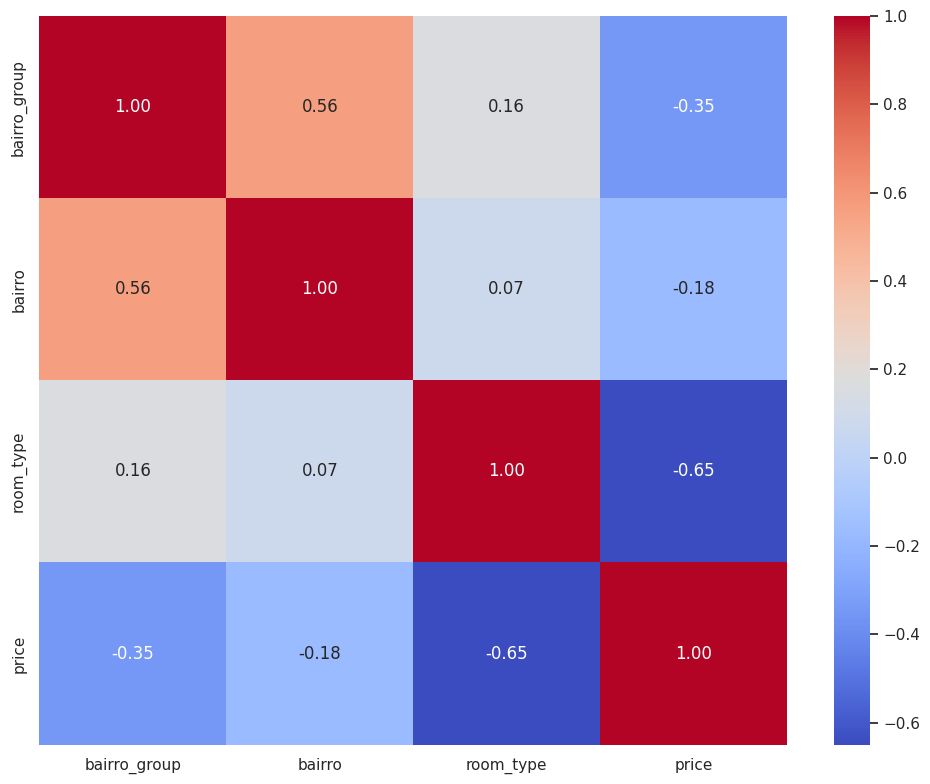

In [997]:
plt.figure(figsize=(10, 8))  # Você pode ajustar esses valores conforme necessário

# Criando o heatmap
sns.heatmap(df_en.corr(), annot=True, fmt=".2f", cmap='coolwarm')

# Mostrando o gráfico
plt.show()

In [998]:
df_en.head()

,bairro_group,bairro,room_type,price
0,0,0,0,5.420535
1,0,1,1,5.017280
2,1,2,0,4.499810
3,0,3,0,4.394449
4,0,4,0,5.303305


##Divisão dos dados em dado de teste e dado de treinameto

In [999]:
from sklearn.model_selection import train_test_split

X = df_en.drop('price', axis=1)  # Todas as colunas exceto 'price'
y = df_en['price']  # Coluna 'price'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Treinamento e avaliação dos modelos de regressão linear, arvore de decisão, random forest e gradient boosting

In [1000]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Supondo que X_train, X_test, y_train, y_test já estejam definidos com base no seu código anterior

# Inicializando os modelos
modelos = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Treinamento e avaliação dos modelos
resultados = {}
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculando o RMSE
    r2 = r2_score(y_test, y_pred)
    resultados[nome] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}
resultados


{'Linear Regression': {'MSE': 0.19887164614993758,
  'RMSE': 0.4459502731806962,
  'R2': 0.48141768716423083},
 'Decision Tree': {'MSE': 0.16399817622992616,
  'RMSE': 0.4049668828804723,
  'R2': 0.5723545554299729},
 'Random Forest': {'MSE': 0.1634916105794052,
  'RMSE': 0.4043409583252792,
  'R2': 0.573675487758618},
 'Gradient Boosting': {'MSE': 0.16644113754629244,
  'RMSE': 0.40797198132505674,
  'R2': 0.5659842328921165}}

#4. previsão do preço de um paratamento especifico


##Como a arvore de decisão teve os melhores valores eu decidi usa-la como principal



In [1013]:

dado = {
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'room_type': 'Entire home/apt'
}
dado = Encode(pd.DataFrame([dado]))


print(np.expm1(modelos['Decision Tree'].predict(dado)))

[218.86242501]


##4. Resposta: como pode ser observado o valor recomendado pra esse apartamento é 218,86

#5. Salvamento do modelo em pkl

In [1057]:
import joblib

# Suponha que `modelo` seja o seu modelo treinado
modelo = modelos['Decision Tree']  # Usando um modelo fictício para exemplificação

def transform_and_predict(input_data):
    # Verificando se input_data é um dicionário e convertendo para DataFrame
    if isinstance(input_data, dict):
        input_data = pd.DataFrame([input_data])
    elif isinstance(input_data, list):
        input_data = pd.DataFrame(input_data)

    # Remoção de colunas
    cols_to_drop = ['id', 'host_id', 'nome', 'host_name', 'price', 'latitude', 'longitude', 'ultima_review',
                    'disponibilidade_365', 'calculado_host_listings_count', 'minimo_noites',
                    'numero_de_reviews', 'reviews_por_mes']
    input_data.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

    # Codificação das variáveis categóricas
    for column in ['bairro_group', 'bairro', 'room_type']:
        input_data[column] = pd.factorize(input_data[column])[0]

    # Faça a previsão com o modelo
    prediction = modelo.predict(input_data)

    # Reverter a transformação logarítmica se aplicável (aqui assumimos que não é aplicável)
    # prediction = np.expm1(prediction)

    return np.expm1(prediction)


In [1060]:
# Salve a função e o modelo como um arquivo .pkl
joblib.dump((transform_and_predict), '/content/drive/MyDrive/ligthouse/model_and_transform.pkl')


['/content/drive/MyDrive/ligthouse/model_and_transform.pkl']

In [1062]:
# Carregue o modelo e a função
loaded_transform_and_predict = joblib.load('/content/drive/MyDrive/ligthouse/model_and_transform.pkl')

# Dado de entrada novo
novo_dado =[{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355},

]  # Substitua {...} pelos seus dados de entrada

# Use a função carregada para fazer previsões
prediction = loaded_transform_and_predict(novo_dado)
print("Previsão:", prediction)


Previsão: [218.86242501]
